In [ ]:
#using Pkg
#Pkg"Luxor"
using luxor

# Visualisations 
## and other useful basics...
This notebook demonstrates how different types of visualisations and customisations can be realised.


Keep your packages and Julia version up-to-date:
```Julia
using Pkg
Pkg.update()
```

We will be using different packages, each with their own specifics:
* [Distributions](https://juliastats.github.io/Distributions.jl/stable/) (for everything related to probability distributions)
* [Plots](http://docs.juliaplots.org/latest/) (for the basic plotting needs)
* [LaTeXStrings](https://github.com/stevengj/LaTeXStrings.jl) (for LaTeX-style text in plots)
* [StatsPlots](https://github.com/JuliaPlots/StatsPlots.jl) (drop-in for Plots, focused on statistical plots e.g. histograms, boxplots etc.)
* [Measures](https://github.com/JuliaGraphics/Measures.jl) (for specific measurements e.g. mm, px etc.)
* [Dates](https://docs.julialang.org/en/v1/stdlib/Dates/index.html) (for datetime functionality)

For an in-depth overview of everything that is possible, please refer to the package  documentation. The illustrations below are intented to show the most common tasks you will encounter during the course and are by no means exhaustive.


#### Storing and accessing data
You will be using a script or a notebook most of the time, so variables only exist in RAM during the runtime of the script or the notebook. For data storage and access, you could use the [JLD2 package](https://github.com/JuliaIO/JLD2.jl).
```Julia
using JLD2
variable1 = [1,1,1]
variable2 = Dict(1=>"a",2=>"b")
# storing both variables:
@save "mydatadump-1.jld2" variable1 variable2
# retrieval of variable2 only:
@load "mydatadump-1.jld2" variable2
```

### Classic plots
There are a lot of available options and arguments for each function. A good starting point is [here]
(https://docs.juliaplots.org/latest/attributes/) in combination with CTRL+F (or CMD+F).

In [1]:
using Plots

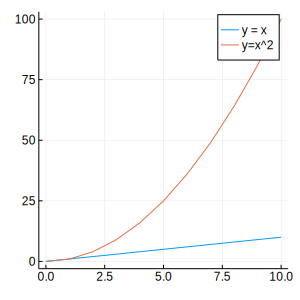

In [6]:
x = range(0,stop=10)
plot(x,x,size=(300,300),label="y = x")
plot!(x,x.^2,label="y=x^2")

Markers can be added by specifying them. Refer to the documentation for all possible options.

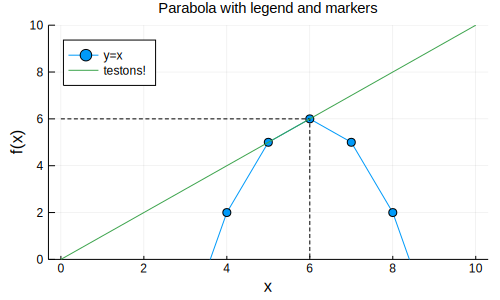

In [8]:
plot(x,-(x .- 6).^2 .+ 6,size=(500,300), label="y=x",legend=:topleft, marker=:circle)
# add another series to same figure (not shown in legend)
plot!([0, 6, 6],[6, 6, 0],label="",linestyle=:dash,linecolor=:black)   
plot!(x,x,label="testons!")
title!("Parabola with legend and markers",titlefontsize=10)
xlabel!("x")
ylabel!("f(x)")
# customising the axis ticks
yticks!([0, 2, 4, 6, 8, 10])
xticks!(range(0,maximum(x),step=2))
# customizing the limits
ylims!(0,10)

Using LaTeX-style notations can give a cleaner impression. Below we generate the same figure, but with a more customised layout:

In [9]:
using LaTeXStrings

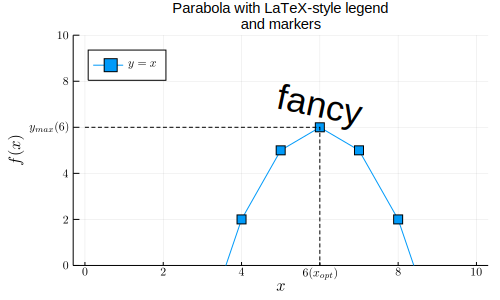

In [113]:
plot(x,-(x .- 6).^2 .+ 6,size=(500,300), label=L"y=x",legend=:topleft, marker=:square)
# add another series to same figure (not shown in legend)
plot!([0, 6, 6],[6, 6, 0],label="",linestyle=:dash,linecolor=:black)   
title!("Parabola with LaTeX-style legend\n and markers",titlefontsize=10)
xlabel!(L"x")
ylabel!(L"f(x)")
# customising the axis ticks
yticks!([0, 2, 4, 6, 8, 10],[L"0", L"2", L"4", L"y_{max} (6)", L"8", L"10"])
xticks!(range(0,maximum(x),step=2),[L"0", L"2", L"4", L"6 (x_{opt})", L"8", L"10"])
# customizing the limits
ylims!(0,10)
# adding some text
annotate!([(6,7,text("fancy",pointsize=24,rotation=-12))])

You can also combine string interpolation with LaTeXStrings:

In [10]:
prom = 172
s = "le meilleure prom est $(prom)"

"le meilleure prom est 172"

In [115]:
a = 4; b = 6
latexstring("\\int_{$(a)}^{$(b)}x^2dx")

L"$\int_{4}^{6}x^2dx$"

If you want only a point cloud, a scatter plot might be more appropriate:

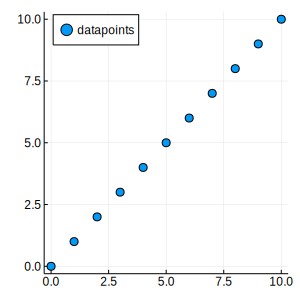

In [116]:
scatter(x,x,label="datapoints",legend=:topleft,size=(300,300))

Other types of plots are possibly suited as well

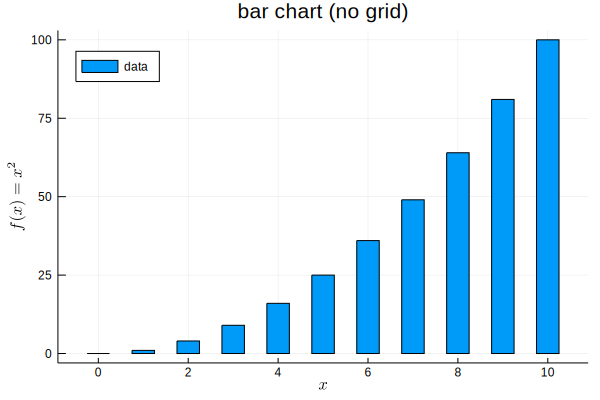

In [15]:
Plots.bar(x,x.^2,orientation=:v,label="data",legend=:topleft,bar_width=0.5,grid=true)
xticks!(range(0,maximum(x),step=2))
xlabel!(L"x")
ylabel!(L"f(x)=x^2")
title!("bar chart (no grid)")

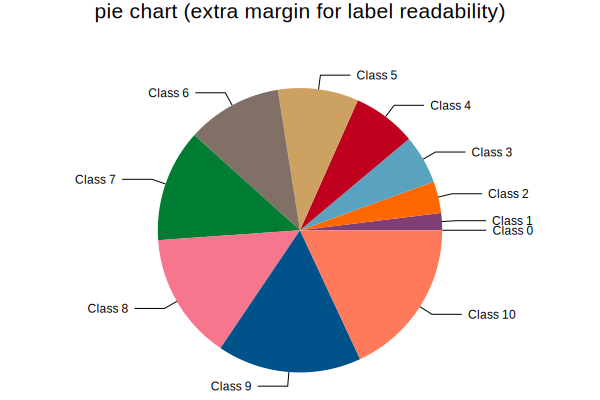

In [17]:
using Measures # required for distances - look what happens if you change te value...
Plots.pie(["Class $(i)" for i in x],x,bottom_margin=5mm)
title!("pie chart (extra margin for label readability)")

Sometimes you might want to change the direction of an axis. The example below shows how this can be done. The y-axis is done in a similar way. Using simply `flip` inverts both axes.

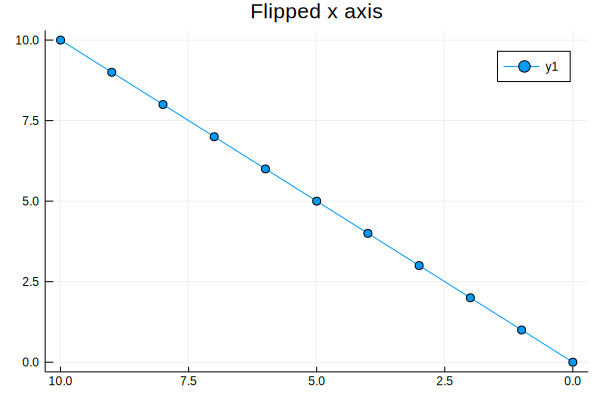

In [127]:
plot(x,x,marker=:circle,xflip=true)
title!("Flipped x axis")

### Subplots (1)

In some cases, it is wishful to show multiple graphs on the same figure. This can be done either by a simple rectangular layout, or following a more advanced lay-out (seen below).

Side-by-side lay-out:



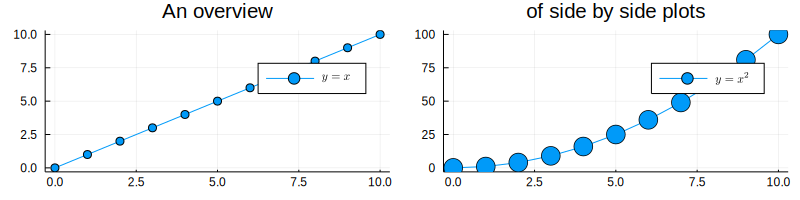

In [18]:
p1 = plot(x,x,label=L"y=x",marker=:circle)
p2 = plot(x, x.^2,label=L"y=x^2",marker=:circle,markersize=10)
plot(p1,p2,layout=(1,2),title=["An overview" "of side by side plots"],size=(800,200))

More advanced lay-outs:

These are created with the `@layout` macro. The lay-out should be seen as a multidimensional array. Specific sizing can be obtained by using the curly brackets and specifying the desired dimensions for width and height. The example below creates a plot with three subplots divided over two rows. In the first row, p1 gets 30% of the total width and p2 gets the remaing 70%.

In [20]:
p1 = plot(x,x,label=L"y=x",marker=:circle)
p2 = plot(x, x.^2,label=L"y=x^2",marker=:circle,markersize=10)
p3 = plot(x, x.^(1/2),label=L"y=\sqrt{x}",marker=:circle,markersize=1)
xticks!(range(0,stop=10))
l = @layout [ [a{0.3w} b{0.7w}]
               c{0.25h}]
p = plot(p1,p2,p3,layout=l,title=["(a)" "(b)" "(c)"])
savefig(p,"demo172.pdf")

In [21]:
pwd()

"/Users/bart/Documents/KMS/ES313/ES313.jl/Exercises"

### Storing the result for a report
Sometimes, you want to export an illustration for use in a publication. Several file formats are available, but file format compatibility depends on the backend that is being used.

```Julia
savefig(p,"mysubplot.pdf") # saves as pdf
savefig(p,"mysubplot.png") # saves as png
```

### Working with logarithmic scales
For some applications, representing the information on a logarithmic scale gives a better overview of what is happening. Remark: if there is zero or negative data in the vector you are trying to plot, this will not work.

Consider for instance the successive approximations of a root with Newton's method: 

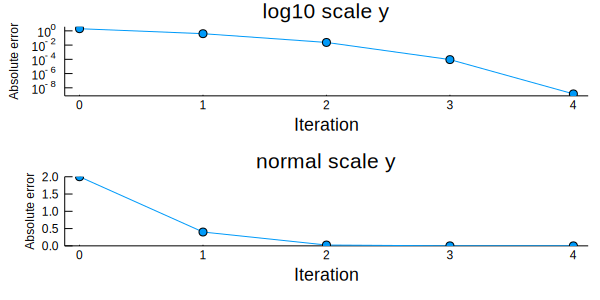

In [134]:
f = x -> x.^2 .- 9
g = x -> x - f(x) ./ (2 .* x)
x0 = [5.0]
for i in 1:4
    push!(x0,g(x0[end]))
end

# note the usage of `xticks!` & `xlabel` to give both graphs the same layout with only one line
plot(plot(range(0,stop=length(x0)-1),abs.(x0 .- 3),yscale=:log10,marker=:circle),
     plot(range(0,stop=length(x0)-1),abs.(x0 .- 3),ylims=(0,2),marker=:circle),
     layout=(2,1),
     title=["log10 scale y" "normal scale y"],
     size=(600,300)
     )

plot!(grid=false,legend=false)
xticks!(range(0, stop=length(x0)-1))
ylabel!("Absolute error",yguidefont=8)
xlabel!("Iteration",xguidefont=12)

### Example - Using date/time in plots
When working with discrete event simulation, we often study the behavior in function of the time. Below is an illustration of using date/time in plots.

Suppose we want to represent a daily measurement. For readability, we desire to have ticks on the x-axis every n days.

In [23]:
using Dates

In [24]:
now()

2019-08-28T09:52:09.23

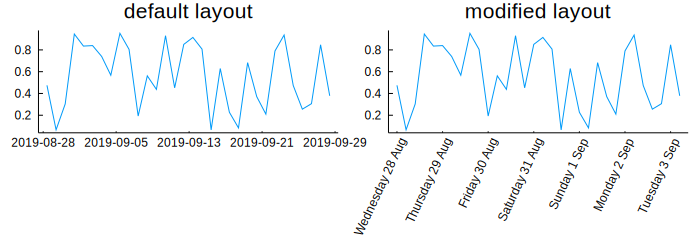

In [26]:
x = now(): Day(1) : now() + Month(1)
y = rand(length(x))

n = 5
p1 = plot(x,y,title="default layout",grid=false,legend=false)
p2 = plot(x,y,title="modified layout",xrotation=65,grid=false,legend=false)

# specifying the tick format (cf. documentation)
datexticks = [Dates.value(mom) for mom in x[1:n:end]]
datexticklabels = Dates.format.(x,"E d u")
xticks!(datexticks,datexticklabels,tickfonthalign=:center)

# final plot
plot(p1,p2,size=(700,250),bottom_margin=10mm)


In [25]:
?Dates.format

```
format(io::IO, tok::AbstractDateToken, dt::TimeType, locale)
```

Format the `tok` token from `dt` and write it to `io`. The formatting can be based on `locale`.

All subtypes of `AbstractDateToken` must define this method in order to be able to print a Date / DateTime object according to a `DateFormat` containing that token.

---

```
format(dt::TimeType, format::AbstractString; locale="english") -> AbstractString
```

Construct a string by using a `TimeType` object and applying the provided `format`. The following character codes can be used to construct the `format` string:

| Code | Examples | Comment                                                   |
|:---- |:-------- |:--------------------------------------------------------- |
| `y`  | 6        | Numeric year with a fixed width                           |
| `Y`  | 1996     | Numeric year with a minimum width                         |
| `m`  | 1, 12    | Numeric month with a minimum width                        |
| `u`  | Jan      | Month name shortened to 3-chars according to the `locale` |
| `U`  | January  | Full month name according to the `locale` keyword         |
| `d`  | 1, 31    | Day of the month with a minimum width                     |
| `H`  | 0, 23    | Hour (24-hour clock) with a minimum width                 |
| `M`  | 0, 59    | Minute with a minimum width                               |
| `S`  | 0, 59    | Second with a minimum width                               |
| `s`  | 000, 500 | Millisecond with a minimum width of 3                     |
| `e`  | Mon, Tue | Abbreviated days of the week                              |
| `E`  | Monday   | Full day of week name                                     |

The number of sequential code characters indicate the width of the code. A format of `yyyy-mm` specifies that the code `y` should have a width of four while `m` a width of two. Codes that yield numeric digits have an associated mode: fixed-width or minimum-width. The fixed-width mode left-pads the value with zeros when it is shorter than the specified width and truncates the value when longer. Minimum-width mode works the same as fixed-width except that it does not truncate values longer than the width.

When creating a `format` you can use any non-code characters as a separator. For example to generate the string "1996-01-15T00:00:00" you could use `format`: "yyyy-mm-ddTHH:MM:SS". Note that if you need to use a code character as a literal you can use the escape character backslash. The string "1996y01m" can be produced with the format "yyyy\ymm\m".


## Exercises

1. Build a function that has two three input parameters $a,b,c$ and that generates a plot of $f(x)=ax^2+bx+c$ for $x \in [0,10]$. The title should be modified automatically.
2. Build a function that maps the interval $[0,n],n\in\mathbb{N}_0$ to $[0,1]$ in a logarithmic way. verify it works properly by making a plot. Use tick marks that are automatically adjusted. The result should be saved as 'mapped.pdf' and contain a timestamp in the title.

## Probability and statistics

In [12]:
using Distributions
using StatsPlots
using LaTeXStrings

Suppose we have a measurement that should follow a multinomial normal distribution: $ X \sim N(\bar{\mu},\Sigma)$, i.e. a measurement in a two-dimensional space. We want to represent this graphically. Severel options can be considered: a 3D-plot, a heatmap, a contour plot.

In [13]:
μ₁ = 10; μ₂ = 20; μ = [μ₁, μ₂]  # mean matrix
Σ = [1.0 0;0 3];                # covariance matrix
d = Distributions.MvNormal(μ,Σ) # multivariate normal distribution

# make a grid
ns = 3
x = range(μ₁ - ns*Σ[1,1], stop=μ₁ + ns*Σ[1,1],length=11)
y = range(μ₂ - ns*Σ[2,2], stop=μ₂ + ns*Σ[2,2],length=11)

# gridpoints (permutation in order to be compatible with `pdf`)
g = permutedims([repeat(x,length(y))  repeat(y,inner=length(x))])

# values
z = pdf(d,g);

Below you can see a 3D point cloud (with and without a color scale for better interpretation of the data).

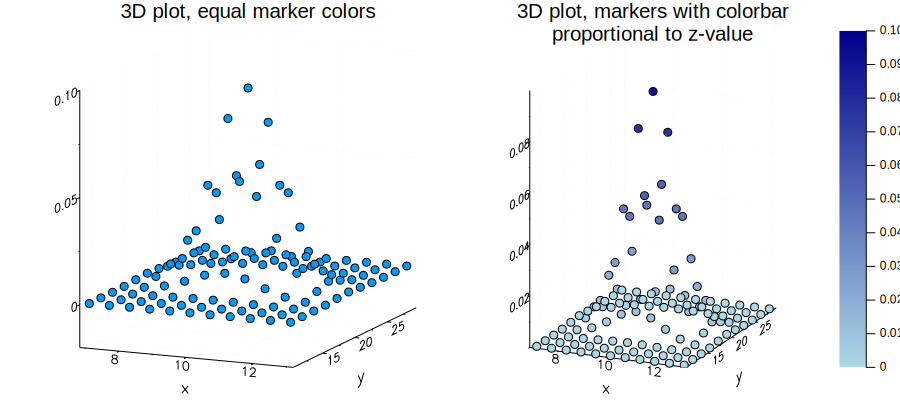

In [14]:
plot(Plots.scatter3d(g[1,:],g[2,:],z,
                     legend=false,title="3D plot, equal marker colors",
                     xlabel="x",ylabel="y",zlabel="f_{X,Y}"),
     Plots.scatter3d(g[1,:],g[2,:],z,marker_z=z,
                     legend=false,title="3D plot, markers with colorbar\n proportional to z-value",
                     xlabel="x",ylabel="y",cbar=true,clim=(0,0.1),colorbar_title="",color=:blues),
     size=(900,400))

Another option would be to use a countour plot:

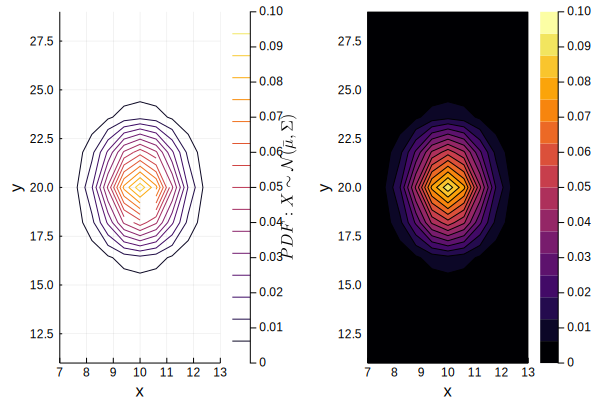

In [15]:
p1 = Plots.contour(x,y,z,clims=(0,0.1),color=:inferno,xlabel="x",ylabel="y",
                   colorbar_title="\$ PDF: X \\sim \\mathcal{N}(\\bar{\\mu},\\Sigma) \$")
p2 = Plots.contour(x,y,z,fill=true,color=:inferno,xlabel="x",ylabel="y",
                   clims=(0,0.1))
plot(p1,p2)

Or a heatmap:

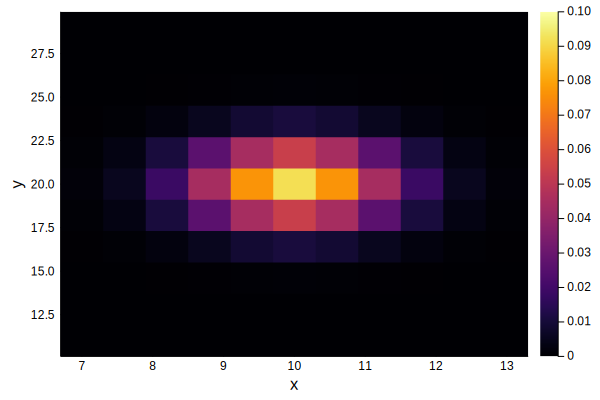

In [16]:
Plots.heatmap(x,y,z,clims=(0,0.1),color=:inferno,xlabel="x",ylabel="y")

Or even a surface plot:

remark: that adding '_r' to an existing colorscale, flips the direction

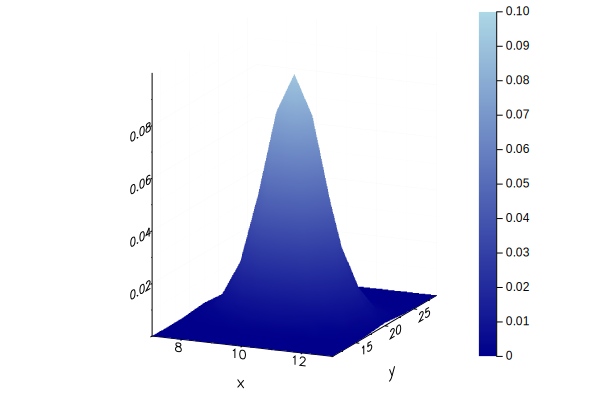

In [17]:
Plots.surface(x,y,z,xlabel="x",ylabel="y",clims=(0,0.1),color=:blues_r)


We have a sample ($ X \sim \chi ^{2}_{k=3}$) that we want to visualize as a boxplot. The following keywords are available:
* `notch=false`: if a notch should be included in the box.
* `range=1.5`: multiple of the inter-quartile range that is used to determine outliers
* `whisker_width=:match`: width of the whiskers
* `outliers=true`: if outliers should be show on the plot
* `bar_width=0.8`: width of the boxplot

Most keywords that work with Plots also work here (as illustrated below)

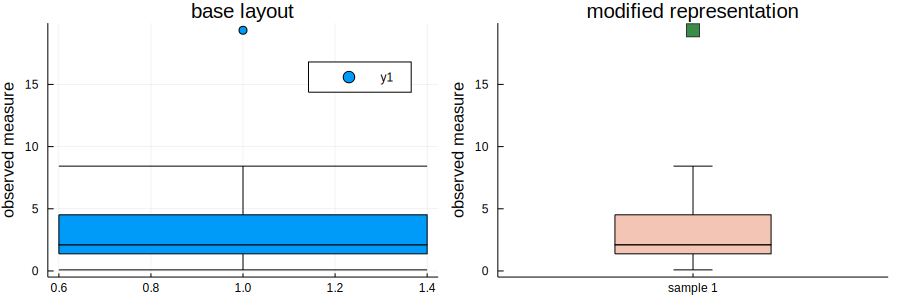

In [24]:
k = 3; n = 40
d = Distributions.Chisq(k)
x = rand(d,n)

plot(StatsPlots.boxplot(x,ylabel="observed measure",title="base layout"),
     StatsPlots.boxplot(x,ylabel="observed measure",legend=false,grid=false,
                        whisker_width = 0.2,
                        title="modified representation",
                        xlims=(0,2),xticks=(1,["sample 1"]),
                        fillalpha=0.4,fillcolor=2,       # specifying different color for box and marker
                        markershape=:square,markercolor=3,markersize=6,markeralpha=0.8
                       ),
     size=(900,300))
    


We want to:
- visualize a probality distribution, both the PDF and the CDF, e.g $X\sim N \left( 10,2  \right)$.
- highlight some accents (annotations)
- gain additional understanding of the concept type II errors. For $\alpha = 0.025$ and for the following $H_0: E[X]<=10,H_1: E[X]>10$ and we are interested in the type II error if $E[X]=16$

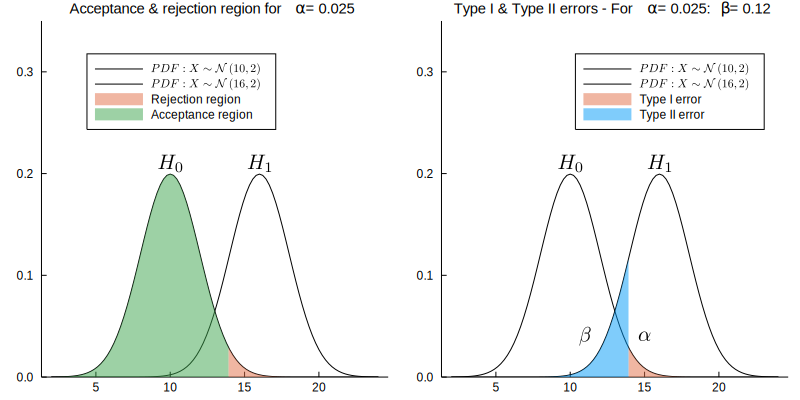

In [25]:
μ = 10; σ = 2
μᵣ = 16
d₀ = Normal(μ,σ)
d₁ = Normal(μᵣ,σ)
α = 0.025

x = range(μ - 4σ,stop=μ + 7σ,length=100)
x_crit = quantile(d₀,1-α)
x_reject = range(x_crit,stop=maximum(x),length=100)
x_accept = range(minimum(x),stop=maximum(x_crit),length=100)

β = pdf(d₁,x_crit)
p1 = plot(x, pdf.(d₀,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μ, $σ \\right)   \$",legend=:top,color=:black,grid=false) # first PDF
     plot!(x, pdf.(d₁,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μᵣ, $σ \\right)   \$",color=:black) # first PDF
     plot!(x_reject,pdf.(d₀,x_reject),fillrange=0,fillalpha=0.5,color=2,label="Rejection region",linealpha=0 ) # fill rejection region
     plot!(x_accept,pdf.(d₀,x_accept),fillrange=0,fillalpha=0.5,color=3,label="Acceptance region",linealpha=0 ) # fill rejection region
     annotate!(μ, 0.21,"\$ H_0 \$")
     annotate!(μᵣ, 0.21,"\$ H_1 \$")
     title!("Acceptance & rejection region for \\alpha= $α ",titlefontsize=10)
     ylims!(0,0.35)

p2 = plot(x, pdf.(d₀,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μ, $σ \\right)   \$",color=:black,grid=false) # first PDF
     plot!(x, pdf.(d₁,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μᵣ, $σ \\right)   \$",color=:black) # first PDF
     plot!(x_reject,pdf.(d₀,x_reject),fillrange=0,fillalpha=0.5,color=2,label="Type I error",linealpha=0 ) # fill alpha region
     plot!(x_accept,pdf.(d₁,x_accept),fillrange=0,fillalpha=0.5,color=1,label="Type II error",linealpha=0 ) # fill beta region
     annotate!(μ, 0.21,"\$ H_0 \$")
     annotate!(μᵣ, 0.21,"\$ H_1 \$")
     annotate!(11, 0.04,"\$ \\beta \$")
     annotate!(15, 0.04,"\$ \\alpha \$")
     title!("Type I & Type II errors - For \\alpha = $α: \\beta = $(round(β,digits=2))",titlefontsize=10)
     ylims!(0,0.35)
plot(p1,p2,size=(800,400))  



We have data and we want to:
* show the emperical and theoretical PDF 
* show the emperical and theoretical CDF 
* get an idea to what extent the data matches a proposed distribution by means of a PP/QQ plot

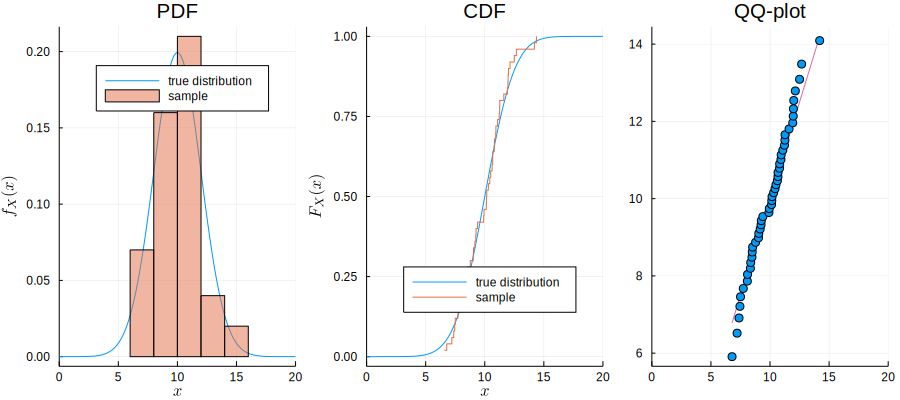

In [26]:
μ = 10; σ=2; n = 50
d = Distributions.Normal(μ,σ)
x = sort(rand(d,n))
x_d = range(μ - 5σ,stop=μ + 5σ,length=100)

p1 = plot(x_d, pdf.(d,x_d),label="true distribution",ylabel="\$ f_X(x) \$",xlabel="\$ x \$",title="PDF")
     histogram!(x,normalize=true,label="sample",fillalpha=0.5,legend=:best)
p2 = plot(x_d, cdf.(d,x_d),label="true distribution",ylabel="\$ F_X(x) \$",xlabel="\$ x \$",title="CDF")
     plot!(x,range(1,stop=length(x))/length(x),legend=:bottomright,linetype=:step,label="sample")
p3 = StatsPlots.qqplot(x,d,title="QQ-plot")
plot(p1,p2,p3,size=(900,400),layout=(1,3),xlims=(μ - 5σ,μ + 5σ))


We have generated some data and want to make 
* a histogram representation (counts).
* a PDF estimation (percentages).
* a kernel density estimation.

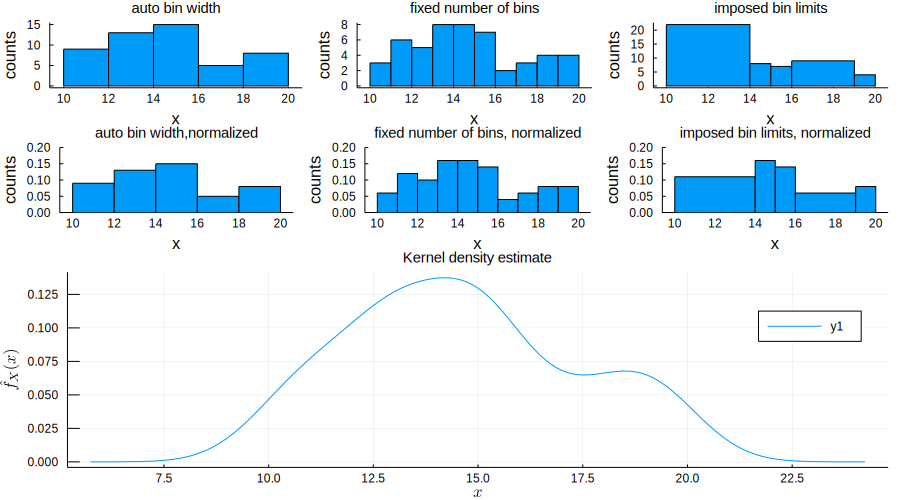

In [27]:
d = Distributions.Uniform(10,20)
x = rand(d,50)

p1 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,title="auto bin width")
p2 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=10,title="fixed number of bins")
p3 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=[10, 14, 14, 15, 16, 19, 20],title="imposed bin limits")
p4 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,title="auto bin width,normalized",normalize=true,ylims=(0,0.2))
p5 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=10,title="fixed number of bins, normalized", 
                          normalize=true,ylims=(0,0.2))
p6 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=[10, 14, 14, 15, 16, 19, 20],
                            title="imposed bin limits, normalized", normalize=true,ylims=(0,0.2))
p7 = StatsPlots.density(x,title="Kernel density estimate",ylabel="\$ \\hat{f}_X(x) \$",xlabel="\$ x \$")

l = @layout [ [a b c]
              [d e f]
              g{0.6h}]
plot(p1,p2,p3,p4,p5,p6,p7,layout=l,size=(900,500))
plot!(titlefontsize=10)

#### Different representations of a sample
We generate random data $x\sim N \left( \mu,\sigma  \right)$ with $\mu = x, \sigma=\sqrt{x}$ for $x \in [2,10]$ and use several methods of representation.

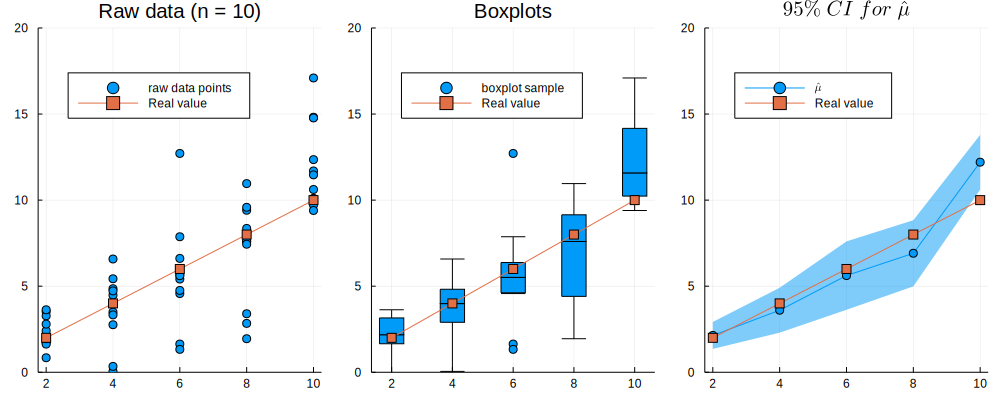

In [28]:
# Basic statistics and sampling
α = 0.05                     # type 1 error
n = 10                       # sample length
x = range(2,stop=10,step=2)  #
d = Normal.(x,sqrt.(x))      # array of distributions
y = [rand(k,n) for k in d]   # actual sample of length n for each distribution
mu_hat = mean.(y)            # 
sigma =  std.(y)             #

# Making a classic plot (raw data points)
p1 = plot(repeat(x,inner=n),collect(Iterators.flatten(y)),
          marker=:circle,linealpha=0,label="raw data points",legend=:topleft)
plot!(x,x,marker=:square,label="Real value")
title!("Raw data (n = $(n))")
ylims!(0,20)

# Making a boxplot plot
p2 = boxplot(repeat(x,inner=n),collect(Iterators.flatten(y)),label="boxplot sample")
plot!(x,x,marker=:square,label="Real value")
plot!(legend=:topleft)
title!("Boxplots")
ylims!(0,20)

# Making a ribbon plot (if normality is OK)
upper = quantile(Normal(),1 - α/2) * sigma / sqrt(n)
lower = upper
p3 = plot(x,mu_hat,marker=:circle,ribbon=(lower,upper),label=L"\hat{\mu}")
plot!(x,x,marker=:square,label="Real value")
plot!(legend=:topleft)
title!(L"95\% \; CI \;for\; \hat{\mu}")
ylims!(0,20)

plot(p1,p2,p3,layout=(1,3),size=(1000,400))

## Exercises
1. Illustrate the difference between the student and the normal distribution for different degrees of freedom. Try this both with subplots and with everything on the same graph.
3. Generate a histogram representing the birthdays of your colleagues. Also make a kernel density estimation and show this as a transparant overlay on the same figure. Save as pdf and compare with the other language group.

### Some Background - colors
The colors that will be used are associated with a palette, i.e. the way your plots will look in general (this includes background, frames, color palette etc. The default value is `:default` and the associated colorset has 17 colors. You can list these by using `palette(:default)`. When making a plot, you can also force to use color N° x by explicitly writing it as in integer. e.g `plot(x,color=1)`. A lot of colors have their own alias e.g. `:blue`

Should you plot more than 17 data series, the list starts again at the beginning. Should you require more for some reason, let's say 20, you can use `get_color_palette(:auto, plot_color(:default),20)`. 




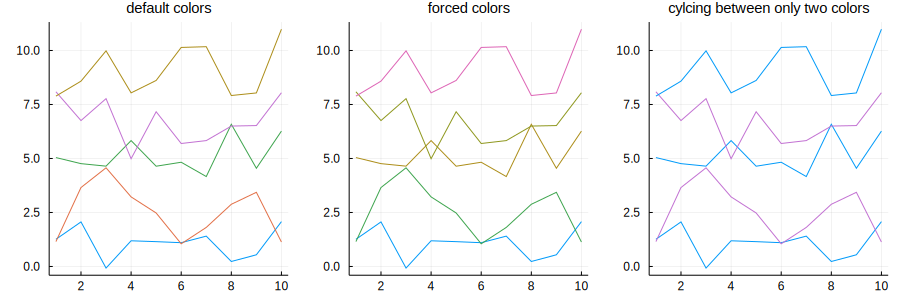

In [29]:
μ = range(1,step=2,length=5)
d = Normal.(μ,1)
x = [rand(dist,10) for dist in d]#rand.(d,5)  # random data, five colums as data series
p1 = plot(x,legend=false)
title!("Default colors")
p2 = plot(x,color=[1 3 5 10 15],legend=false)
title!("Forced colors")

p = get_color_palette(:auto, plot_color(:white),20)
p3 = plot(x,color=[p[1] p[4]],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300),title=(["default colors" "forced colors"  "cylcing between only two colors"]),titlefontsize=10)